In [1]:
import scanpy as sc
sc.settings.verbosity = 3   

In [2]:
### Read 10x dataset
adata = sc.read_10x_h5("neuron_10k_v3_filtered_feature_bc_matrix.h5")
# Make variable names (in this case the genes) unique
adata.var_names_make_unique()

reading neuron_10k_v3_filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:02)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


## PCA Without Filter

computing PCA
    with n_comps=50
    finished (0:00:30)


... storing 'feature_types' as categorical
... storing 'genome' as categorical


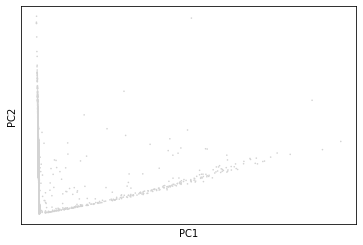

In [3]:
adata_raw=adata
sc.tl.pca(adata_raw)
sc.pl.pca(adata_raw)

## PCA With Filter

filtered out 195 cells that have less than 200 genes expressed
filtered out 9977 genes that are detected in less than 1 cells
normalizing counts per cell
    finished (0:00:00)


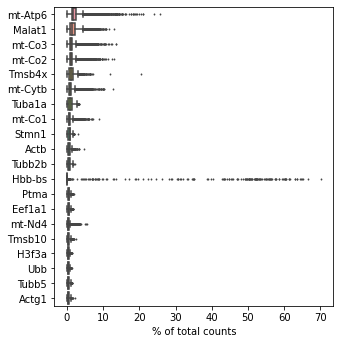

In [4]:
#filter out low count cells and genes
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=1)
sc.pl.highest_expr_genes(adata, n_top=20)

In [5]:
# All my top genes were mitochondrial and ribosomal, so I found some code online that gets those out

import numpy as np
# remove mito genes
malat1 = adata.var_names.str.startswith('Malat1')
mito_genes = adata.var_names.str.startswith('mt-')
remove = np.add(mito_genes, malat1)
keep = np.invert(remove)
adata = adata[:,keep]

In [6]:
sc.pp.normalize_total(adata,exclude_highly_expressed=True)
sc.pp.highly_variable_genes(adata, flavor = 'cell_ranger', n_top_genes=1000)
adata = adata[:, adata.var['highly_variable']]

/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell The following highly-expressed genes are not considered during normalization factor computation:
['Tmsb4x', 'S100a8', 'S100a9', 'Tnc', 'Spp1', 'Ftl1', 'Hbb-bt', 'Hbb-bs', 'Fabp7', 'Bsg', 'Lyz2', 'Hba-a1', 'Hba-a2', 'Ctla2a', 'Gm42418', 'Fth1']
    finished (0:00:00)
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [7]:
adata

View of AnnData object with n_obs × n_vars = 11648 × 1000
    obs: 'n_genes'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'pca', 'hvg'
    obsm: 'X_pca'
    varm: 'PCs'

normalizing counts per cell
    finished (0:00:00)


/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


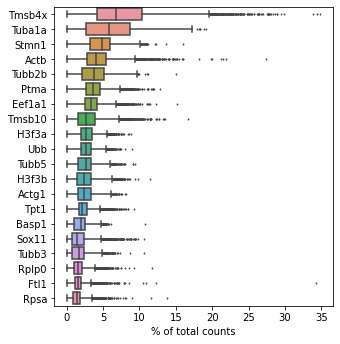

In [8]:
sc.pl.highest_expr_genes(adata, n_top=20)

In [9]:
adata.var

,gene_ids,feature_types,genome,n_cells,highly_variable,means,dispersions,dispersions_norm
Oprk1,ENSMUSG00000025905,Gene Expression,mm10,8,True,0.002152,9.292999,6.638703
Ppp1r42,ENSMUSG00000025916,Gene Expression,mm10,19,True,0.001919,6.368046,4.012813
1500015O10Rik,ENSMUSG00000026051,Gene Expression,mm10,827,True,0.180631,5.199429,4.827662
Col3a1,ENSMUSG00000026043,Gene Expression,mm10,66,True,0.020344,13.719792,12.424631
Slc40a1,ENSMUSG00000025993,Gene Expression,mm10,125,True,0.036911,8.228857,7.303082
...,...,...,...,...,...,...,...,...
Cc2d2b,ENSMUSG00000108929,Gene Expression,mm10,2,True,0.001396,14.638533,11.437680
Wnt8b,ENSMUSG00000036961,Gene Expression,mm10,111,True,0.021528,7.954639,6.002759
Col17a1,ENSMUSG00000025064,Gene Expression,mm10,13,True,0.002207,13.034441,9.997600
Pnlip,ENSMUSG00000046008,Gene Expression,mm10,12,True,0.003559,7.580068,4.557319


computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)


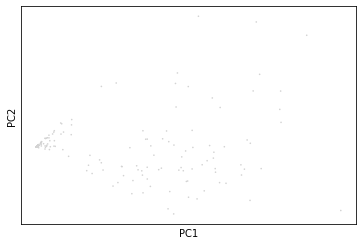

In [10]:
sc.tl.pca(adata)
sc.pl.pca(adata)

## Leiden

In [11]:
n=sc.pp.neighbors(adata, use_rep = 'X', copy = True)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:01:01)


In [12]:
l=sc.tl.leiden(n, copy = True)

running Leiden clustering
    finished: found 21 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:02)


computing tSNE
    using 'X_pca' with n_pcs = 50
    using sklearn.manifold.TSNE with a fix by D. DeTomaso
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:01:43)


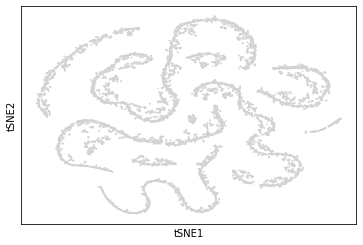

In [13]:
sc.tl.tsne(l)
sc.pl.tsne(l)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:09)


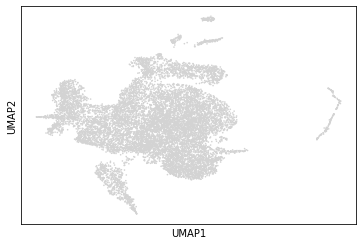

In [14]:
sc.tl.umap(l)
sc.pl.umap(l)

## Gene Groups

In [15]:
l

AnnData object with n_obs × n_vars = 11648 × 1000
    obs: 'n_genes', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'pca', 'hvg', 'neighbors', 'leiden', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [16]:
max_iter=100000
sc.tl.rank_genes_groups(l, groupby='leiden', method = 't-test')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/scanpy/tools/_rank_genes_groups.py:404: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


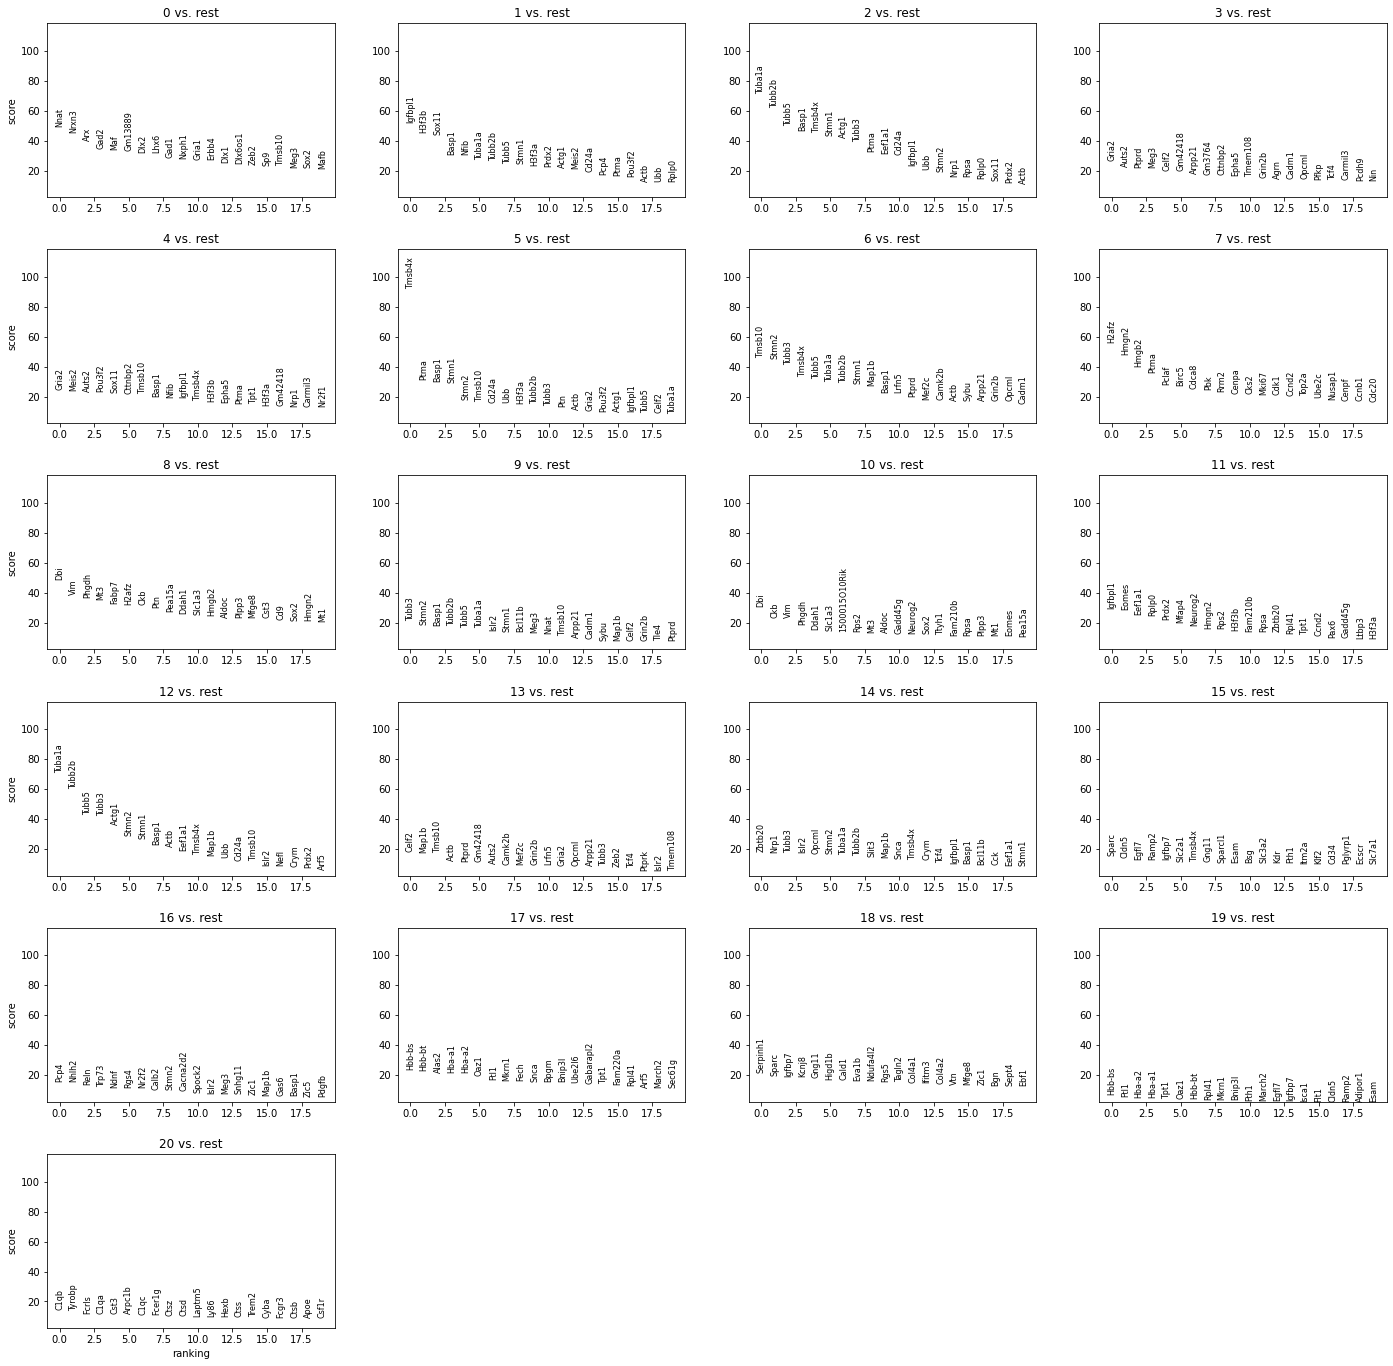

In [17]:
sc.pl.rank_genes_groups(l)

In [18]:
l

AnnData object with n_obs × n_vars = 11648 × 1000
    obs: 'n_genes', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'pca', 'hvg', 'neighbors', 'leiden', 'umap', 'rank_genes_groups'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [19]:
sc.tl.rank_genes_groups(l, groupby='leiden', method = 'logreg')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
 (0:00:05)


/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


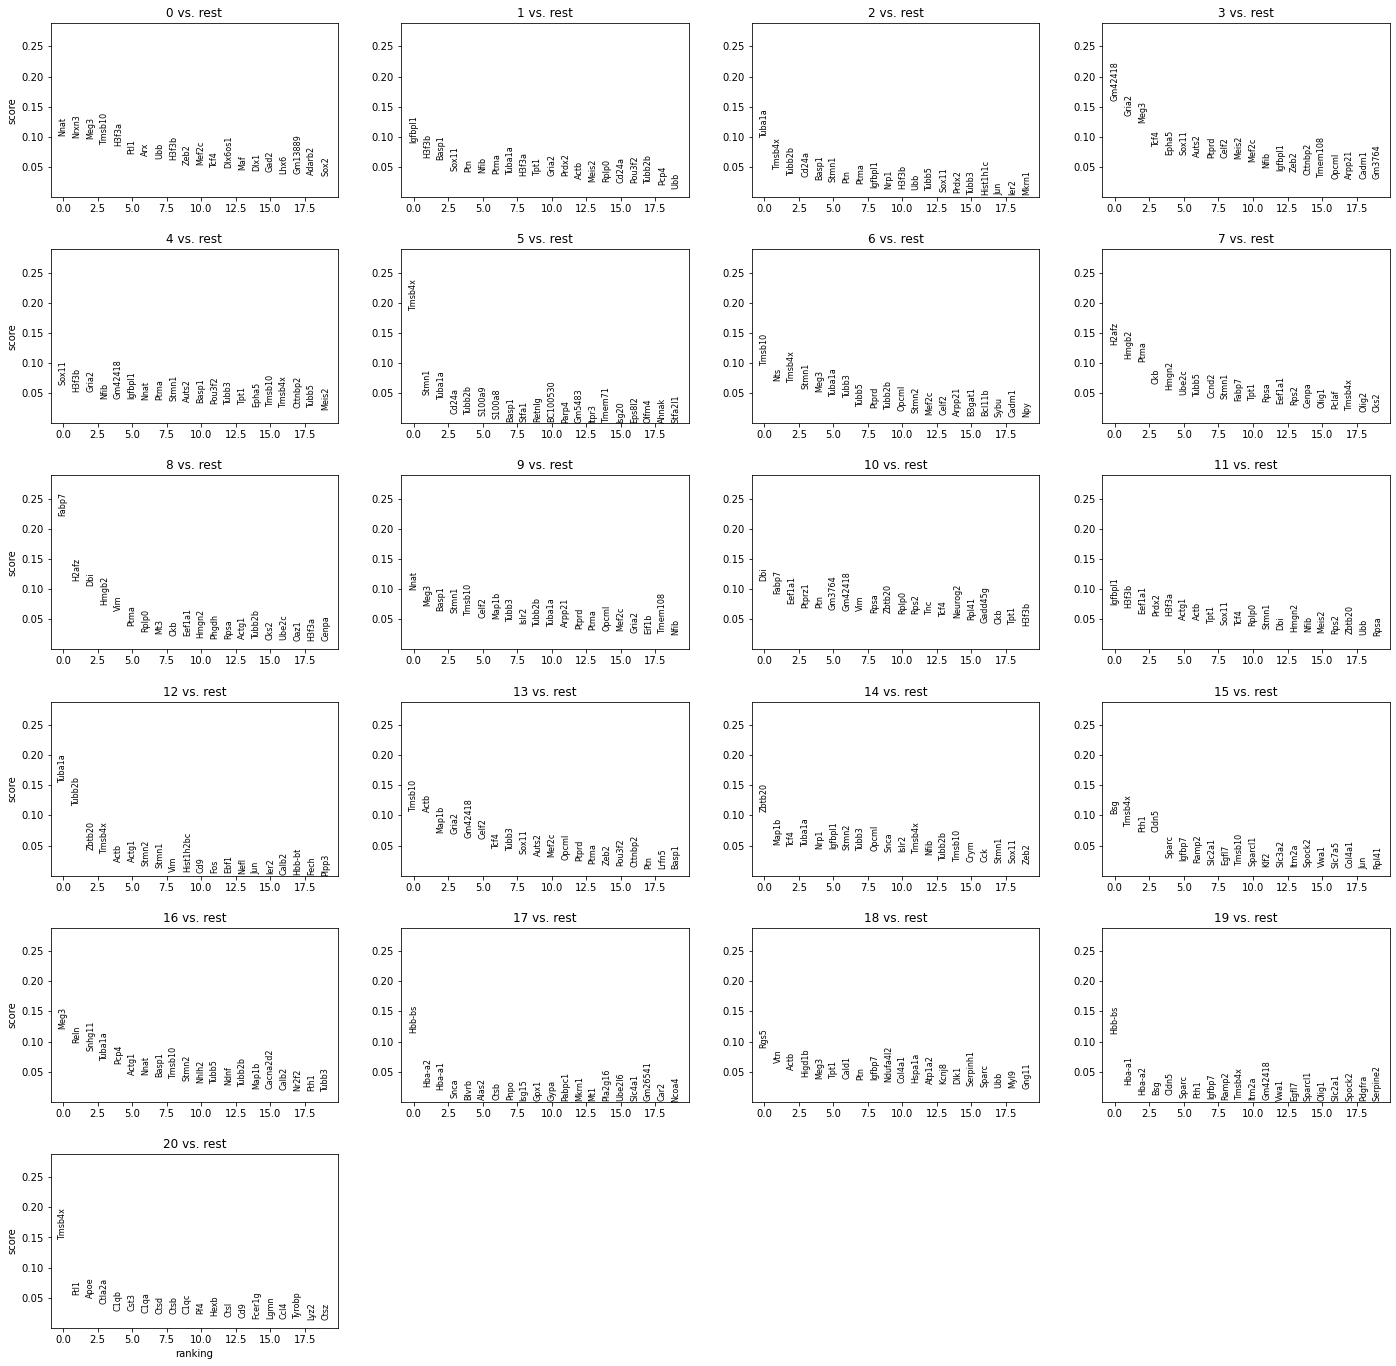

In [20]:
sc.pl.rank_genes_groups(l)

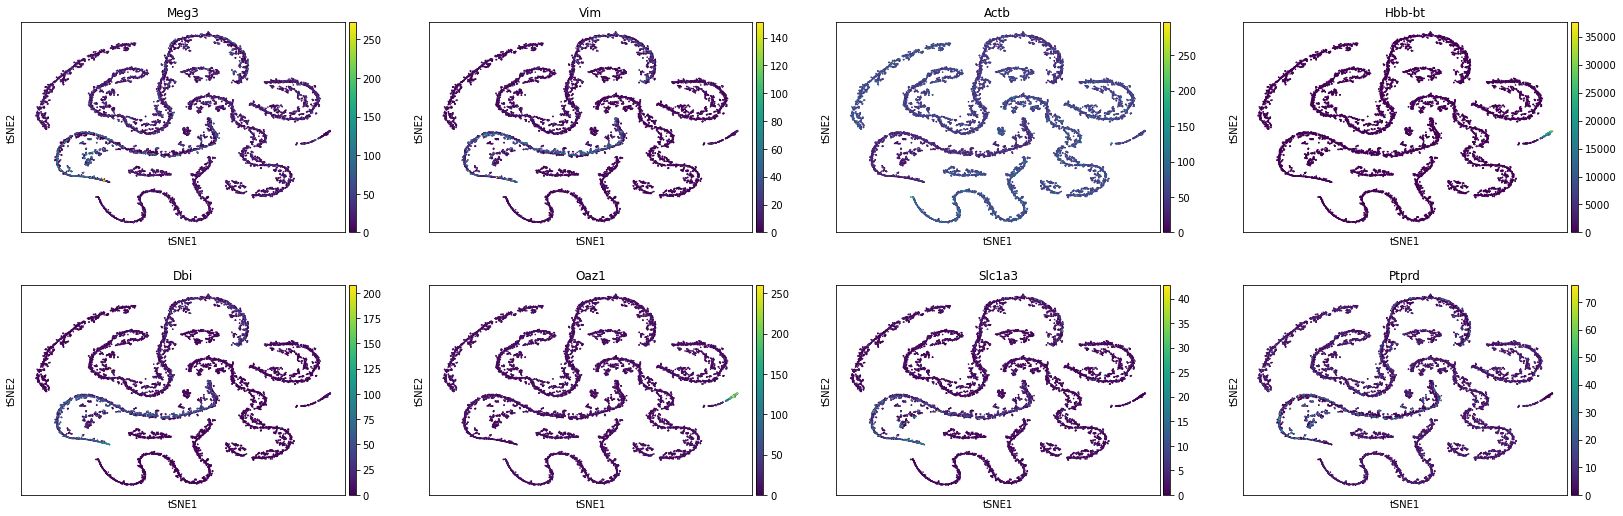

In [146]:
sc.pl.tsne(l,  color = ['Meg3', 'Vim', 'Actb', 'Hbb-bt', 'Dbi', 'Oaz1', 'Slc1a3', 'Ptprd'])

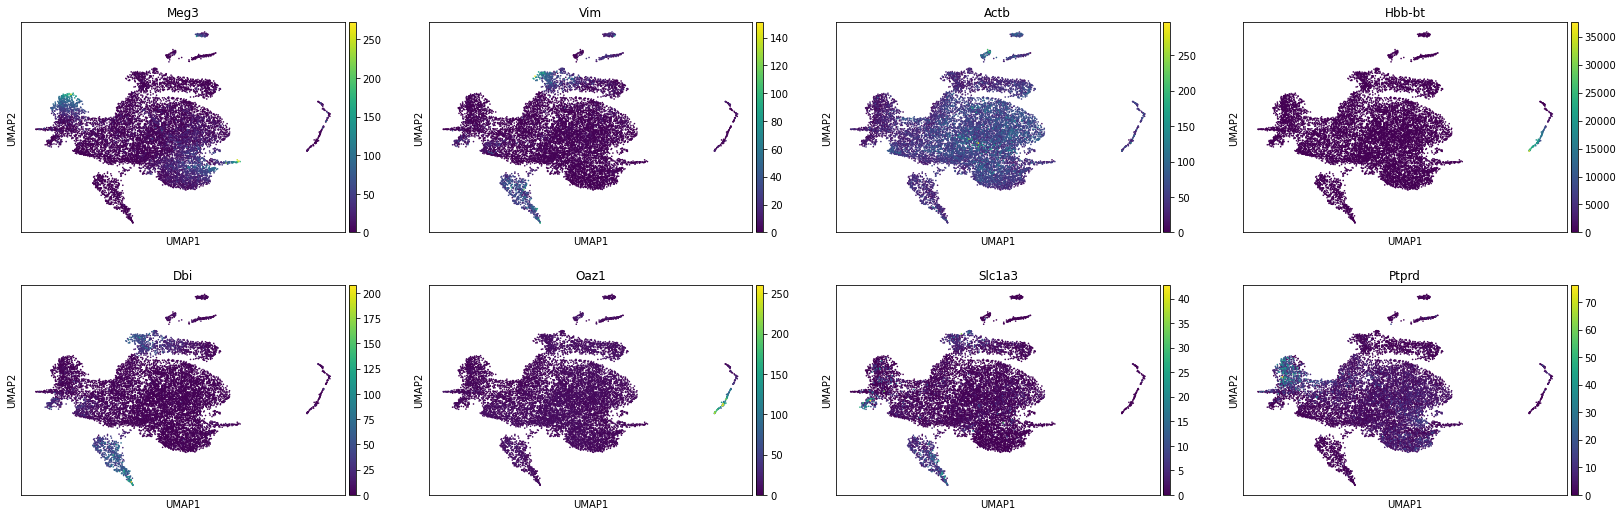

In [147]:
sc.pl.umap(l,  color = ['Meg3', 'Vim', 'Actb', 'Hbb-bt', 'Dbi', 'Oaz1', 'Slc1a3', 'Ptprd'])